<a href="https://colab.research.google.com/github/codewithharsha/DeepLearning/blob/main/DeepLearningParctice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Word2Vec**

In [ ]:
pip install gensim

In [ ]:
import gensim
import pandas as pd
from gensim.models import word2vec

In [ ]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz

--2024-04-11 13:28:43--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45409631 (43M) [application/x-gzip]
Saving to: ‘reviews_Cell_Phones_and_Accessories_5.json.gz’

reviews_Cell_Phones 100%[===================>]  43.31M  11.3MB/s    in 4.4s    

2024-04-11 13:28:47 (9.77 MB/s) - ‘reviews_Cell_Phones_and_Accessories_5.json.gz’ saved [45409631/45409631]



In [ ]:
!gunzip /content/reviews_Cell_Phones_and_Accessories_5.json.gz

gzip: /content/reviews_Cell_Phones_and_Accessories_5.json.gz: No such file or directory


In [ ]:
data = pd.read_json("/content/reviews_Cell_Phones_and_Accessories_5.json",lines=True)
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [ ]:
my_data = data.reviewText

In [ ]:
#tokenize
my_data = my_data.apply(gensim.utils.simple_preprocess)

In [ ]:
model = gensim.models.Word2Vec(
    window = 10,
    min_count=2,
    workers=4
)

In [ ]:
model.build_vocab(my_data)

In [ ]:
model.train(my_data,epochs=5,total_examples=model.corpus_count)

(61506571, 83868975)

In [ ]:
model.wv.most_similar("worst")

[('best', 0.7534727454185486),
 ('nicest', 0.6807442903518677),
 ('cheapest', 0.6759535074234009),
 ('strongest', 0.6633410453796387),
 ('clearest', 0.645651638507843),
 ('greatest', 0.6418971419334412),
 ('smoothest', 0.6182113289833069),
 ('cutest', 0.6159796118736267),
 ('hardest', 0.6124846339225769),
 ('sturdiest', 0.6034882068634033)]

## **Spam mail Classification**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
!wget https://raw.githubusercontent.com/Gopikanth123/sms-spam-prediction/main/spam.csv

--2024-04-11 16:09:27--  https://raw.githubusercontent.com/Gopikanth123/sms-spam-prediction/main/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.02s   

2024-04-11 16:09:27 (20.8 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
data = pd.read_csv("/content/spam.csv",encoding="latin-1")

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True,axis=1)

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
x = data.v2
y = data.v1

In [ ]:
enc = LabelEncoder()
y_encoded = enc.fit_transform(y)
print(y_encoded)

[0 0 1 ... 0 0 0]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y_encoded,test_size=0.2)

In [ ]:
#pre processing textual data
max_words = 1000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)

In [ ]:
sequence_matrix = tf.keras.utils.pad_sequences(sequences,maxlen=max_len)

In [ ]:
model = tf.keras.Sequential([
    Embedding(input_dim=max_words,input_length=max_len,output_dim=50),
    LSTM(64),
    Dense(256,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")
])

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(seq_mat,y_train,epochs=5)

Epoch 1/5
140/140 [==============================] - 10s 56ms/step - loss: 0.1728 - accuracy: 0.9421
Epoch 2/5
140/140 [==============================] - 7s 48ms/step - loss: 0.0351 - accuracy: 0.9899
Epoch 3/5
140/140 [==============================] - 8s 55ms/step - loss: 0.0200 - accuracy: 0.9946
Epoch 4/5
140/140 [==============================] - 8s 55ms/step - loss: 0.0123 - accuracy: 0.9973
Epoch 5/5
140/140 [==============================] - 7s 48ms/step - loss: 0.0069 - accuracy: 0.9980


In [ ]:
test_seq = tok.texts_to_sequences(x_test)
test_seq_mat = tf.keras.utils.pad_sequences(test_seq,maxlen=max_len)

In [ ]:
loss,acc = model.evaluate(test_seq_mat,y_test)

35/35 [==============================] - 1s 15ms/step - loss: 0.0825 - accuracy: 0.9812


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## **Gradient Descent**

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.9)
var = tf.Variable(0.5)
cost = lambda:2 + var**2

In [ ]:
x = []
y = []
for _ in range(10):
  sgd.minimize(cost,var_list=[var])
  x.append(cost().numpy())
  y.append(var.numpy())

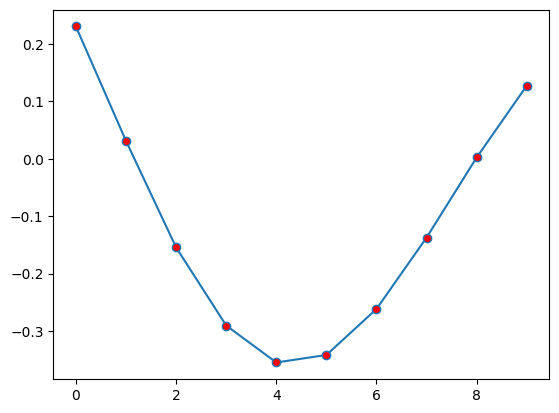

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y,marker="o",markerfacecolor="red")

## **Digit Classification**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

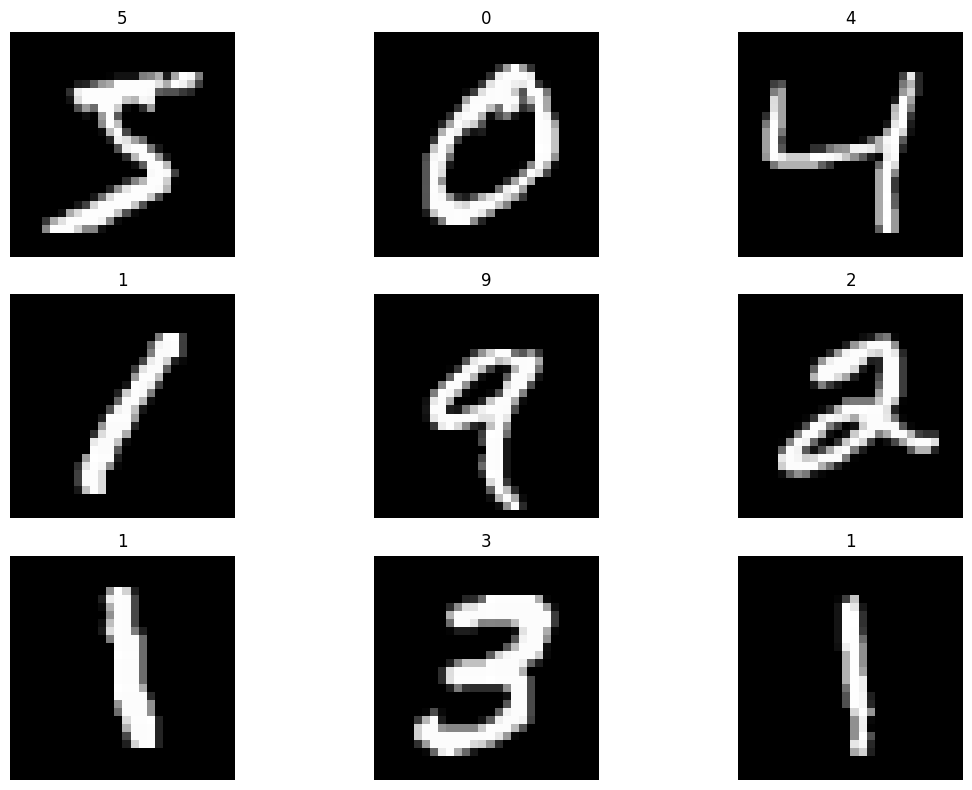

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)

In [ ]:
#model
model = tf.keras.Sequential([
    Dense(10,input_shape=(784,),activation="sigmoid")
])

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")

In [ ]:
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2617 - accuracy: 0.9276
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9279
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2553 - accuracy: 0.9293
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2528 - accuracy: 0.9299
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2508 - accuracy: 0.9303


In [ ]:
loss,acc = model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2626 - accuracy: 0.9265


In [ ]:
pred = np.expand_dims(x_test_flat[0],axis=0)
res = model.predict(pred)
print(np.argmax(res))

1/1 [==============================] - 0s 19ms/step
7


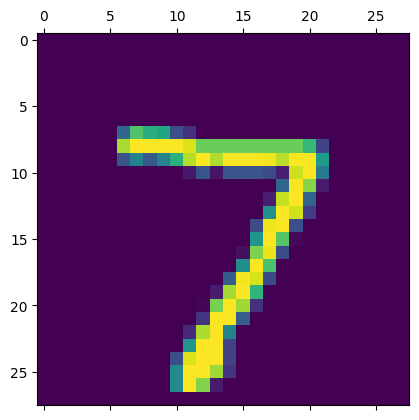

In [ ]:
plt.matshow(x_test[0])

## **Image Classification on CIFAR Dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


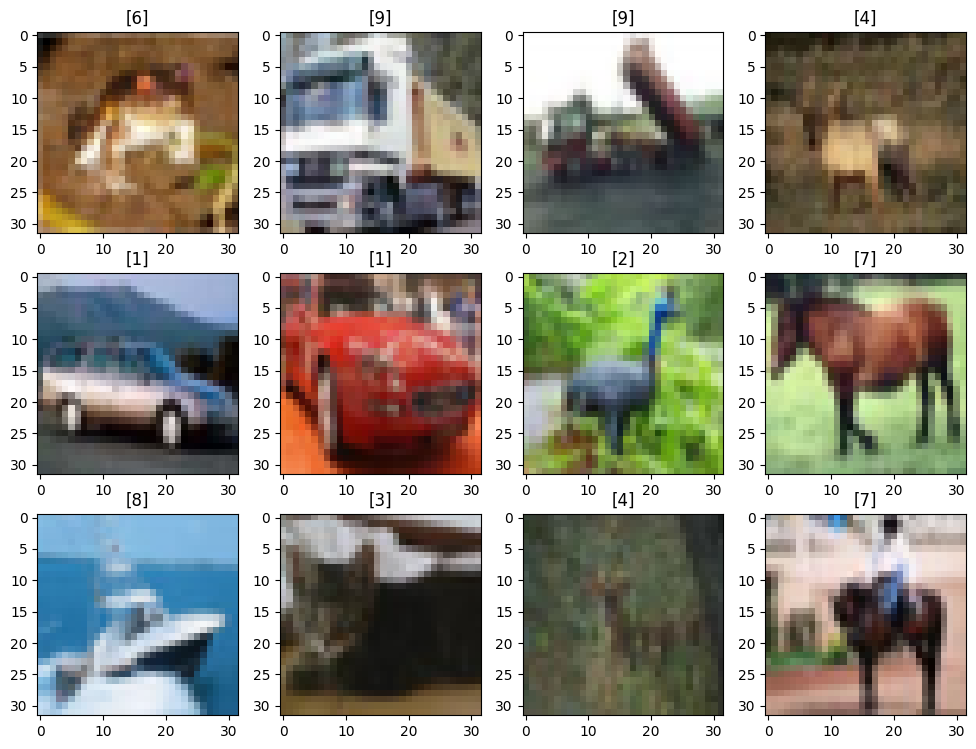

In [ ]:
plt.figure(figsize=(12,12))
for i in range(12):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
model = tf.keras.Sequential([
    Conv2D(32,(3,3),input_shape=(32,32,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation="relu"),
    Dense(32,activation="relu"),
    Dense(10,activation="sigmoid")
])

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 69s 43ms/step - loss: 1.5154 - accuracy: 0.4460
Epoch 2/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1496 - accuracy: 0.5898
Epoch 3/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0205 - accuracy: 0.6411
Epoch 4/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9454 - accuracy: 0.6674
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8808 - accuracy: 0.6910


In [ ]:
loss,acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9260 - accuracy: 0.6778


1/1 [==============================] - 0s 91ms/step


Text(0.5, 1.0, '8')

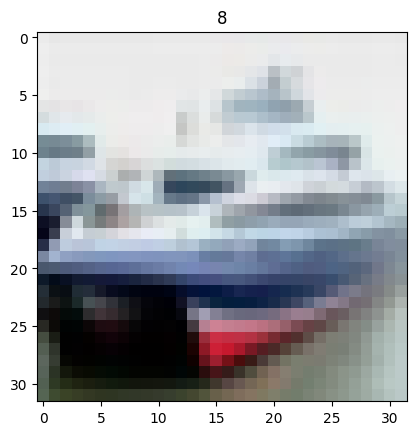

In [ ]:
pred_img = np.expand_dims(x_test[1],axis=0)
res = np.argmax(model.predict(pred_img))
plt.imshow(x_test[1])
plt.title(res)

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 6s 19ms/step


In [ ]:
y_pred = [np.argmax(i) for i in y_pred]

<Axes: >

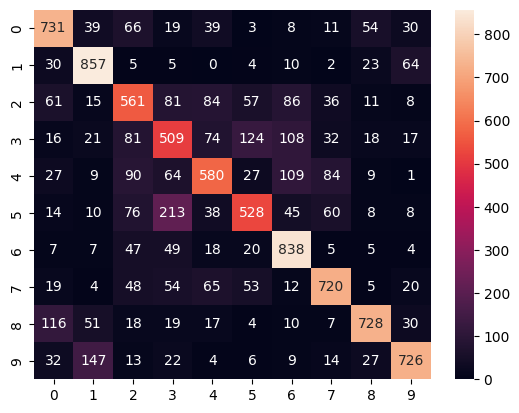

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

## **Lions Vs Tiger**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
import matplotlib.pyplot as plt

In [ ]:
# train_data_gen = .ImageDataGenerator(rescale=1./255)
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_data = data_generator.flow_from_directory(
    directory="/content/drive/MyDrive/Tigers and Lions/train",
    target_size=(256,256),
    class_mode="categorical",
    batch_size=32,
    classes=["TIGER","PUMA"]
)

test_data = data_generator.flow_from_directory(
    directory="/content/drive/MyDrive/Tigers and Lions/test",
    target_size=(256,256),
    class_mode="categorical",
    batch_size=32,
    classes=["TIGER","PUMA"]
)

Valid_data = data_generator.flow_from_directory(
    directory="/content/drive/MyDrive/Tigers and Lions/valid",
    target_size=(256,256),
    class_mode="categorical",
    batch_size=32,
    classes=["TIGER","PUMA"]
)

Found 473 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


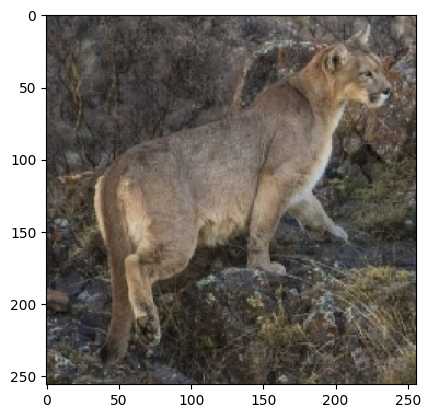

In [ ]:
images, labels = next(train_data)
plt.imshow(images[0])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(2,activation="sigmoid"),
])

In [ ]:
model.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")

In [ ]:
model.fit(train_data,validation_data=Valid_data,epochs=5)

Epoch 1/5
15/15 [==============================] - 89s 6s/step - loss: 1.0070 - accuracy: 0.5243 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 2/5
15/15 [==============================] - 64s 4s/step - loss: 0.6570 - accuracy: 0.6131 - val_loss: 0.7347 - val_accuracy: 0.6000
Epoch 3/5
15/15 [==============================] - 63s 4s/step - loss: 0.5450 - accuracy: 0.7315 - val_loss: 0.7024 - val_accuracy: 0.7000
Epoch 4/5
15/15 [==============================] - 64s 4s/step - loss: 0.4286 - accuracy: 0.8076 - val_loss: 0.9173 - val_accuracy: 0.7000
Epoch 5/5
15/15 [==============================] - 63s 4s/step - loss: 0.3229 - accuracy: 0.8689 - val_loss: 0.6788 - val_accuracy: 0.6000


## **Stock price Predction**

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler

In [10]:
data = pd.read_csv("/content/Google_Stock_Price_Train.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [11]:
data = data.iloc[:,1:2]
data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [14]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [15]:
data_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [17]:
x_train = []
y_train = []
for i in range(60,len(data_scaled)):
  x_train.append(data_scaled[i-60:i,0])
  y_train.append(data_scaled[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [22]:
x_train.shape

(1198, 60)

In [31]:
x_train_reshaped = np.expand_dims(x_train,axis=2)
y_train_reshaped = np.expand_dims(y_train,axis=1)

In [32]:
x_train_reshaped.shape

(1198, 60, 1)

In [33]:
y_train_flattened.shape

(1198,)

In [37]:
model = tf.keras.Sequential([
    LSTM(units=50,input_shape=(x_train_reshaped.shape[1],1),return_sequences=True),
    Dropout(0.3),
    LSTM(units=50,return_sequences=True),
    Dropout(0.3),
    LSTM(units=50,return_sequences=True),
    Dense(1)
])

In [38]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [39]:
model.fit(x_train_reshaped,y_train_reshaped,epochs=5)

Epoch 1/5
38/38 [==============================] - 17s 119ms/step - loss: 0.0602
Epoch 2/5
38/38 [==============================] - 4s 95ms/step - loss: 0.0218
Epoch 3/5
38/38 [==============================] - 3s 86ms/step - loss: 0.0172
Epoch 4/5
38/38 [==============================] - 3s 85ms/step - loss: 0.0146
Epoch 5/5
38/38 [==============================] - 6s 160ms/step - loss: 0.0130


In [40]:
test_data = pd.read_csv("/content/Google_Stock_Price_Test.csv")
test_data = test_data.iloc[:,1:2]
test_data.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [48]:
test_data = pd.concat([data,test_data])

In [52]:
test_data_scaled = scaler.fit_transform(test_data)
test_data_scaled = test_data_scaled.reshape(-1)

In [53]:
test_data_scaled.shape

(1278,)

In [56]:
x_test = []
y_test = []
for i in range(60,len(test_data_scaled)):
  x_test.append(test_data_scaled[i-60:i])
  y_test.append(test_data_scaled[i])

x_test = np.array(x_test)
y_test = np.array(y_test)

In [57]:
x_test.shape

(1218, 60)

In [58]:
x_test = np.expand_dims(x_test,axis=2)
y_test = np.expand_dims(y_test,axis=1)

In [60]:
y_test.shape

(1218, 1)

In [61]:
y_pred = model.predict(x_test)

39/39 [==============================] - 5s 49ms/step


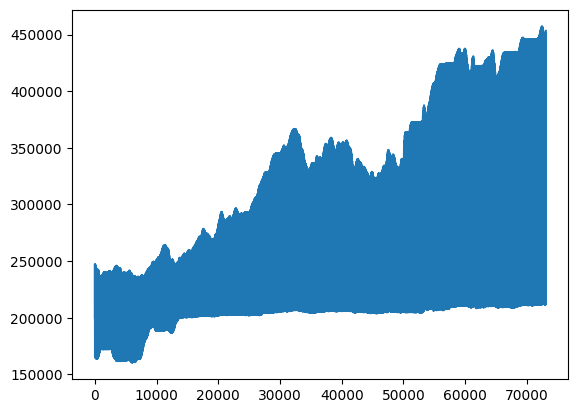

In [67]:
y_pred_reshaped = np.reshape(y_pred, (-1, y_pred.shape[-1]))
y_pred_reshaped = np.reshape(y_pred_actual, (-1, y_pred_actual.shape[-1]))

y_pred_actual = scaler.inverse_transform(y_pred_reshaped)

plt.plot(y_pred_actual)

In [68]:
y_pred_actual

array([[199724.08],
       [222725.44],
       [238039.75],
       ...,
       [449967.47],
       [451866.38],
       [453240.94]], dtype=float32)